In [1]:
# Dataframes
# Dataframes is one of the key ways of working with tabular data in Python, we use it for storing, manipulating, and using data.
# To use them, we need to import the package/library that has them to our workspace, this is called pandas.
# Every time we use the package, we'd have to tell Python we want to, but calling 'pandas' is a bit long to do over and over,
# so the accepted way is to import pandas as pd, and we can use pd as short for pandas.
# Pandas is a Python library used for working with data sets.
# It has functions for analyzing, cleaning, exploring, and manipulating data.
# The name "Pandas" has a reference to both "Panel Data", and "Python Data Analysis"
import pandas as pd

# Import Numpy as np is a powerful library used to support data analysis and manipulation operations.
# Numpy stands for Numerical Python.
# It has various uses in terms of structure optimization, data analysis, array mathematics and matrix operations.
import numpy as np
import os

In [2]:
# here we are creating a dataframe by reading a .csv file from a file path     pd.read_csv(<filepath>)
filepath = 'https://raw.githubusercontent.com/data-to-insight/csc-validator-be-903/main/tests/fake_data/header.csv'
# for a directory filepath (rather than a web link) this CANNOT be read if using the web version of Github.
# for reading a directory filepath using GitHub Desktop, put an 'r' in front of the path e.g. filepath = r'https://raw.githubu   '
header_fake = pd.read_csv(filepath)
# to read an Excel file pd.read_excel(<filepath>)
print(header_fake.head(10))
print(header_fake.tail(10))

    CHILD  SEX         DOB ETHNIC            UPN  MOTHER MC_DOB
0  566910    2  27/03/2008   WROM  D051910639385     NaN    NaN
1  384923    2  09/09/2011   REFU  L034811502612     NaN    NaN
2  709901    1  14/02/2013   ABAN  Y021751958510     NaN    NaN
3  550084    2  04/05/2008   AOTH  R095578985099     NaN    NaN
4  710229    2  15/04/2002   REFU  Z095096287583     NaN    NaN
5  733831    1  06/07/2013   WROM  Z005227500041     NaN    NaN
6   69112    2  11/09/2010   ABAN  X089575916879     NaN    NaN
7  853884    2  09/10/2004   WBRI  U096513817313     NaN    NaN
8  634852    2  19/10/2006   WIRI  X019131453866     NaN    NaN
9  512087    1  01/10/2003   MOTH  J091207487052     NaN    NaN
       CHILD  SEX         DOB ETHNIC            UPN  MOTHER MC_DOB
2665  199656    1  08/07/2009   WOTH  G006043737339     NaN    NaN
2666  587124    1  14/10/2006   AOTH  X013739746473     NaN    NaN
2667  558581    1  05/07/2001   MWBC  S048947751783     NaN    NaN
2668  937984    2  08/05/200

In [3]:
# here we are creating a fairly basic dataframe. We start by creating a dictionary with 3 values for each key.
d = {"ColumnA":['ValueX', 2, 'ValueY'],
     "ColumnB":[4, 5, 6],
     "ColumnC":['foo', 'bar', 'baz']}

df_1  = pd.DataFrame(d)
print(df_1)
# print(df_1.info())   optional

  ColumnA  ColumnB ColumnC
0  ValueX        4     foo
1       2        5     bar
2  ValueY        6     baz


In [1]:
# Perhaps a more intuitive way of building a Data Frame, one dictionary per row
df_2 = pd.DataFrame([
    {'letter':'A',
     'word':'Foo',
     'number':1},
     {'letter':'B',
     'word':'Bar',
     'number':2},
     {'letter':'C',
     'word':'Baz',
     'number':3},
])

print(df_2)
print(df_2.dtypes)
# print(df_2.info())

NameError: name 'pd' is not defined

In [5]:
# here are some operations that can be done on Columns in our dataframe

# we can sum strings, not particularly useful here, but there may be circumstances where it is useful...
print(df_2.sum())

letter          ABC
word      FooBarBaz
number            6
dtype: object


In [6]:
# Obviously you can't do some numeric functions on strings, so we will look at the 'number' column in the df (using square brackets)
# firstly we will find the mean, which is 2.0
print(df_2['number'].mean())
# cumulative sum is also useful. Notice that the answer it provides is a table, and then sinfo on the Column and Type.
print(df_2['number'].cumsum())
# Min and max. Notice we can access a column using . notation rather than square braces if we want, though square brackets is more common
print([df_2['number'].min(), df_2.number.max()])

2.0
0    1
1    3
2    6
Name: number, dtype: int64
[1, 3]


In [7]:
# briefly introducing some functions and conditionals e.g. mapping

# for example, here we create an additional calculated field called 'product 3' in our df
df_2['product 3'] = df_2['number'] * 3
# we can also perform actions on columns easily, for example, multiplying each row in the number column by 3 to make a new column
print(df_2)

# here we create an another calculated field called 'multiple_of_3' in our df, this is done in 2 stages:
# Stage 1: we define the calculation
def multiple_of_3(x):
    if x % 3:
        return 'Yes'
    else:
        return 'No'
# Stage 2: we create the new field. We use mapping .map() if we want to perform a defined action on every row.
df_2['multiple of 3'] = df_2['number'].map(multiple_of_3)
print(df_2)

  letter word  number  product 3
0      A  Foo       1          3
1      B  Bar       2          6
2      C  Baz       3          9
  letter word  number  product 3 multiple of 3
0      A  Foo       1          3           Yes
1      B  Bar       2          6           Yes
2      C  Baz       3          9            No


In [8]:
# we will create a new dataframe to work with...
staff = pd.DataFrame([
   {'Name':'Will Levack-Payne',
    'Salary':'35000',
    'Job Title':'Teacher'},
    {'Name':'Annie Levack-Payne',
    'Salary':'52000',
    'Job Title':'Head Teacher'},
   {'Name':'Andy Levack-Payne',
    'Salary':'12000',
    'Job Title':'Trainee Teacher'},
    {'Name':'Naiomi Levack-Payne',
    'Salary':'24000',
    'Job Title':'Sports coach'},
    {'Name':'Scout Dog',
    'Salary':'0',
    'Job Title':'Dog'}
])
print(staff['Salary'])
print(staff[['Name','Job Title']])
# print(staff.info())    optional
staff['Salary'] = staff['Salary'].astype('int')
print(staff['Salary'].dtypes)
mean_salary = staff['Salary'].mean()
sum_salary = staff['Salary'].sum()
cumsum_salary = staff['Salary'].cumsum()
max_salary = staff['Salary'].max()
min_salary = staff['Salary'].min()
print(f'Mean salary is: {mean_salary}')
print(f'Total of salaries is: {sum_salary}')
print(f'Cumulative Sum of salaries is: {cumsum_salary}')
print(f'Max and Min salaries respectively are {max_salary}, {min_salary}.')

0    35000
1    52000
2    12000
3    24000
4        0
Name: Salary, dtype: object
                  Name        Job Title
0    Will Levack-Payne          Teacher
1   Annie Levack-Payne     Head Teacher
2    Andy Levack-Payne  Trainee Teacher
3  Naiomi Levack-Payne     Sports coach
4            Scout Dog              Dog
int64
Mean salary is: 24600.0
Total of salaries is: 123000
Cumulative Sum of salaries is: 0     35000
1     87000
2     99000
3    123000
4    123000
Name: Salary, dtype: int64
Max and Min salaries respectively are 52000, 0.


In [9]:
# Everyone at the company has had a pay rise. Update the salary column to reflect this by using the * operator by 1.07,
# and setting it equal to the same column. Print the new column using the square bracket method.
# Use the .map method and the pre-written function (below) on your dataframe to make a new column indicating whose salary
# is above average (The average uk salary is £33,402). 

def above_average(x):
    if x > 33402:
        return 'Above average'
    if x == 33402:
        return 'Average'
    else:
        return 'Below average'
staff['comparison'] = staff['Salary'].map(above_average)
print(staff)


                  Name  Salary        Job Title     comparison
0    Will Levack-Payne   35000          Teacher  Above average
1   Annie Levack-Payne   52000     Head Teacher  Above average
2    Andy Levack-Payne   12000  Trainee Teacher  Below average
3  Naiomi Levack-Payne   24000     Sports coach  Below average
4            Scout Dog       0              Dog  Below average


In [10]:
import pandas as pd
# Add a start date column to the dataframe of employees (staff). Print the updated df.
# Using DataFrame.insert() to add a column
staff = staff.assign(start_date=['19/02/2012','04/01/2005', '15/11/2018', '27/08/2021', '23/10/2017'])
print(staff)
# Convert it to a datetime data type.
# if '19/02/2012' is the 1st date entered then it all works OK, but not if '04/01/2005' is the 1st date entered.
# we use the 'format=' to deal with this
staff['start_date']= pd.to_datetime(staff['start_date'], format="%d/%m/%Y")
# source: https://sparkbyexamples.com/pandas/pandas-convert-string-column-to-datetime/

                  Name  Salary        Job Title     comparison  start_date
0    Will Levack-Payne   35000          Teacher  Above average  19/02/2012
1   Annie Levack-Payne   52000     Head Teacher  Above average  04/01/2005
2    Andy Levack-Payne   12000  Trainee Teacher  Below average  15/11/2018
3  Naiomi Levack-Payne   24000     Sports coach  Below average  27/08/2021
4            Scout Dog       0              Dog  Below average  23/10/2017


In [11]:
# add a column for years worked.
staff['days_worked'] = pd.to_datetime('18/01/2024', dayfirst=True) - staff['start_date']
# It's now a time delta object (in days), we want this in years.

# again, if we use 08/01/2024 instead of 18/01/2024 we get problems with the date format
import numpy as np
staff['years_worked'] = staff['days_worked'] / pd.Timedelta('365 days')
staff['years_worked'] = staff['years_worked'].round().astype('int', errors='ignore')
# Round, convert to integers, ignoring the error produced by the empty value for age
print(staff)

# Use the .mean() method on the years worked column to calculate the average time people have worked for and assign this for a variable.
mean_years_worked = staff['years_worked'].mean()
print(f'Average years worked is {mean_years_worked}')

                  Name  Salary        Job Title     comparison start_date  \
0    Will Levack-Payne   35000          Teacher  Above average 2012-02-19   
1   Annie Levack-Payne   52000     Head Teacher  Above average 2005-01-04   
2    Andy Levack-Payne   12000  Trainee Teacher  Below average 2018-11-15   
3  Naiomi Levack-Payne   24000     Sports coach  Below average 2021-08-27   
4            Scout Dog       0              Dog  Below average 2017-10-23   

  days_worked  years_worked  
0   4351 days            12  
1   6953 days            19  
2   1890 days             5  
3    874 days             2  
4   2278 days             6  
Average years worked is 8.8


In [12]:
# Make a new dataframe by copying the previous Dataframe, give it an appropriate name
staff2 = staff[['Name','Salary','Job Title','years_worked']].copy()
# Choose only rows where the years worked value is greater than the average.
staff2 = staff2[staff2['years_worked'] > mean_years_worked]
# An easy way to make a new column and add values to it, is to have the dataframe column and set it equal
# to a list of values you want, in order.
# For example 'df['numbers'] = [1, 2, 3, 4, 5]'. Make sure you have as many items in your list as you have rows in the dataframe.
# If the new column is dates, add the dates as strings, and all in the same format (eg dd/mm/yyyy).
staff2['extra_date'] = ['28/05/2023', '30/09/2023']
# then convrt the new column containing dates to date format. 
staff2['extra_date'] = pd.to_datetime(staff2['extra_date'], format="%d/%m/%Y")
print(staff2)


                 Name  Salary     Job Title  years_worked extra_date
0   Will Levack-Payne   35000       Teacher            12 2023-05-28
1  Annie Levack-Payne   52000  Head Teacher            19 2023-09-30


In [13]:
# In this cell use the .str.lower() method to make all the names in the employee names column lower case
staff2['Name'] = staff2['Name'].str.lower()
# You now need to make two new columns, one for first and one for last name.
# Use this stack overflow link to learn how to split columns in pandas: 
# https://stackoverflow.com/questions/38437847/pandas-split-name-column-into-first-and-last-name-if-contains-one-space
# You can use str.split to split the strings, then test the number of splits using str.len and use this as a boolean mask
# to assign just those rows with the last component of the split:
staff2.loc[staff2['Name'].str.split().str.len() == 2, 'first name'] = staff2['Name'].str.split().str[0]
staff2.loc[staff2['Name'].str.split().str.len() == 2, 'last name'] = staff2['Name'].str.split().str[-1]
staff2['ID'] = ['A803', 'A807']
print(staff2)

                 Name  Salary     Job Title  years_worked extra_date  \
0   will levack-payne   35000       Teacher            12 2023-05-28   
1  annie levack-payne   52000  Head Teacher            19 2023-09-30   

  first name     last name    ID  
0       will  levack-payne  A803  
1      annie  levack-payne  A807  


In [14]:
# In this cell, make a dataframe for a new employee, with all the same columns as before, and an extra 'employee ID' column.
extra_list = {'Name':['Bob Peck'],'Salary':[40000],'Job Title':['cowboy'],'years_worked':['3'],'extra_date':[''],
              'first name':['Bob'],'last name':['Peck'],'ID':['A704']}
extra_staff  = pd.DataFrame(extra_list)
print(extra_staff)
# Use the pd.concat() method to join it to your employees dataframe.
staff3 = pd.concat([staff2, pd.DataFrame(extra_staff)], ignore_index=True)
print(staff3)

       Name  Salary Job Title years_worked extra_date first name last name  \
0  Bob Peck   40000    cowboy            3                   Bob      Peck   

     ID  
0  A704  
                 Name  Salary     Job Title years_worked           extra_date  \
0   will levack-payne   35000       Teacher           12  2023-05-28 00:00:00   
1  annie levack-payne   52000  Head Teacher           19  2023-09-30 00:00:00   
2            Bob Peck   40000        cowboy            3                        

  first name     last name    ID  
0       will  levack-payne  A803  
1      annie  levack-payne  A807  
2        Bob          Peck  A704  


In [15]:
# Make a new dataframe of your employees names and some employee IDs, then merge it with your big dataframe,
# and use the drop, fillna, and rename methods to clean it up.
# To finish off, make a new dataframe with every employee from your large employees dataframe with a column for
# their employee IDs, and a new column for their managers. 
# Merge this to the bigger dataframe and print it to see that merging doesn't always need any clean up!

In [1]:
# Session 4 start for real
import pandas as pd
df = pd.DataFrame({'ChildId':['id1', 'id2', 'id3', 'id4', 'id5'],
                  'Age first contact':[6,12,11,1,19],
                  'Gender':['M','m', 'F', '', 'F' ],
                  'Birthday':['01/01/2002', '02/02/2003', pd.NA, '03/03/2023', '06/01/2012'],
                  'CP Plan?':['Y', 'n', 'N', 'No', 'yES'],})
print(df.info())
print(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ChildId            5 non-null      object
 1   Age first contact  5 non-null      int64 
 2   Gender             5 non-null      object
 3   Birthday           4 non-null      object
 4   CP Plan?           5 non-null      object
dtypes: int64(1), object(4)
memory usage: 328.0+ bytes
None
  ChildId  Age first contact Gender    Birthday CP Plan?
0     id1                  6      M  01/01/2002        Y
1     id2                 12      m  02/02/2003        n
2     id3                 11      F        <NA>        N
3     id4                  1         03/03/2023       No
4     id5                 19      F  06/01/2012      yES


In [17]:
# We will use this new df to go though some key DF processes:
# a) making selections based on criteria
# b) some basic data cleaning
# c) making sure data is of the right type
import numpy as np

In [18]:
# unique_genders = df['Gender'].unique - what was this?!

In [19]:
# map function is a bit like an IF function in Excel.
# The Python 'map' method is worth knowing about, but there are more efficient methods.
gender_dict = {'M':'m',
               'm':'m',
               'F':'f',
               'f':'f'}
df['Gender'] = df['Gender'].map(gender_dict)
# this next line does the same thing but better
df['Gender'] = df['Gender'].str.lower()
print(df)

  ChildId  Age first contact Gender    Birthday CP Plan?
0     id1                  6      m  01/01/2002        Y
1     id2                 12      m  02/02/2003        n
2     id3                 11      f        <NA>        N
3     id4                  1    NaN  03/03/2023       No
4     id5                 19      f  06/01/2012      yES


In [20]:
# next we deal with NA values in the Gender column
df['Gender'] = df['Gender'].fillna(pd.NA)
df['Gender'] = df['Gender'].replace('', pd.NA)
# the following line uses a 'regular expression' instead of a blank space.
# the regular expression for a blank space is:  r'^\s*4'
df['Gender'] = df['Gender'].replace(r'^\s*4', pd.NA, regex=True)
print(df)

  ChildId  Age first contact Gender    Birthday CP Plan?
0     id1                  6      m  01/01/2002        Y
1     id2                 12      m  02/02/2003        n
2     id3                 11      f        <NA>        N
3     id4                  1   <NA>  03/03/2023       No
4     id5                 19      f  06/01/2012      yES


In [21]:
# calculate age at 31/03/2024
# making sure stuff is the right type: our dates are strings, we need them to be dates
df['Birthday'] = pd.to_datetime(df['Birthday'], format='%d/%m/%Y', errors = 'coerce')
# Now it's a datetime object, we can do a calculation to work out current ages!
df['Age March 31'] = pd.to_datetime('31/03/2024',dayfirst=True) - df['Birthday']
# It's now a time delta object, we want age in years!
df['Age March 31'] = df['Age March 31'] / pd.Timedelta('365 days')
# next line rounds, converts to integers, ignores the error produced by the empty value for age.
df['Age March 31'] = df['Age March 31'].round(1).astype('int', errors = 'ignore')
print(df)

  ChildId  Age first contact Gender   Birthday CP Plan?  Age March 31
0     id1                  6      m 2002-01-01        Y          22.3
1     id2                 12      m 2003-02-02        n          21.2
2     id3                 11      f        NaT        N           NaN
3     id4                  1   <NA> 2023-03-03       No           1.1
4     id5                 19      f 2012-01-06      yES          12.2


In [22]:
# calculate age at today
df['Age'] = pd.to_datetime('today').normalize() - df['Birthday']
df['Age'] = df['Age'] / pd.Timedelta('365 days')
# next line rounds, converts to integers, ignores the error produced by the empty value for age.
df['Age'] = df['Age'].round().astype('int', errors = 'ignore')
print(df)

  ChildId  Age first contact Gender   Birthday CP Plan?  Age March 31   Age
0     id1                  6      m 2002-01-01        Y          22.3  22.0
1     id2                 12      m 2003-02-02        n          21.2  21.0
2     id3                 11      f        NaT        N           NaN   NaN
3     id4                  1   <NA> 2023-03-03       No           1.1   1.0
4     id5                 19      f 2012-01-06      yES          12.2  12.0


In [23]:
# Lets do an error check and take rows where first contact is an age older then their current age
error_df = df[df['Age first contact'] > df['Age']]
print(error_df) # We can see, based on our selection, child id5 has an error

  ChildId  Age first contact Gender   Birthday CP Plan?  Age March 31   Age
4     id5                 19      f 2012-01-06      yES          12.2  12.0


In [24]:
# We've converted to dates, calculated ages, and found a row with errors, lets do a little cleaning now.

# Convert all gender values to lower case
df['Gender'] = df['Gender'].str.lower()

# convert all cp plan? to lower... but we still need the right things in each column
df['CP Plan?'] = df['CP Plan?'].str.lower()
print(df)

  ChildId  Age first contact Gender   Birthday CP Plan?  Age March 31   Age
0     id1                  6      m 2002-01-01        y          22.3  22.0
1     id2                 12      m 2003-02-02        n          21.2  21.0
2     id3                 11      f        NaT        n           NaN   NaN
3     id4                  1   <NA> 2023-03-03       no           1.1   1.0
4     id5                 19      f 2012-01-06      yes          12.2  12.0


In [25]:
# Look at the values in the column 'CP Plan?'. We are going to tidy up this mess here.
# We will use a lambda function to change values based on other values.
# this next example of lambda usage is a bit like the map function we used earlier.
cp_cleaner = lambda row : 'y' if 'y' in row else 'n' if 'n' in row else pd.NA
df['CP Plan?'] = df['CP Plan?'].str.lower().apply(cp_cleaner)

# .fillna() can be used to fill empty rows with whatever we want.
df = df.fillna(pd.NA)
# The standard would be pd.NA which pandas understands as NAs
# Note, this hasn't worked for our empty value in gender as an empty string is still a string!

# replace field that's entirely space (or empty) with NaN
df = df.replace(r'^\s*$', pd.NA, regex=True)
# The easiest way to fill it is replacing the regex expression for an empty string with an na.
# We can see in the table below we have a NaN, an <NA>, and an NaT.
# These are the Not a Number, Empty, and Not a Time NAs for each data type.
print(df)

  ChildId  Age first contact Gender   Birthday CP Plan?  Age March 31   Age
0     id1                  6      m 2002-01-01        y          22.3  22.0
1     id2                 12      m 2003-02-02        n          21.2  21.0
2     id3                 11      f        NaT        n           NaN   NaN
3     id4                  1   <NA> 2023-03-03        n           1.1   1.0
4     id5                 19      f 2012-01-06        y          12.2  12.0


In [26]:
# Question:  what is the difference between a cp_cleaner lambda function and a for loop?
# This 'for loop' method is messier than using a panda method to loop
# for i in range len(df):
#     i = i-1
#     value = df['CP Plan?'].iloc [i]
#    if value...

In [27]:
# Lets say we have another child
new_child = {
    'ChildId':['id6'],
    'Current Age': [10],
    'Age first contact':[9],
    'Gender':['m'],
    'Birthday':[pd.to_datetime('28/02/2014', dayfirst=True)],
    'Age at End of Reporting Period':[10],
    'NHS Number':['78132']
}
print(new_child)

{'ChildId': ['id6'], 'Current Age': [10], 'Age first contact': [9], 'Gender': ['m'], 'Birthday': [Timestamp('2014-02-28 00:00:00')], 'Age at End of Reporting Period': [10], 'NHS Number': ['78132']}


In [28]:
# here we join df and new_child dataframes using concat function
import pandas as pd
new_child = pd.DataFrame(new_child)
df = pd.concat([df, new_child], ignore_index=True)
# then to remove duplicate rows we do...
df.drop_duplicates(subset='ChildId', keep='last', inplace=True)
print(df)

  ChildId  Age first contact Gender   Birthday CP Plan?  Age March 31   Age  \
0     id1                  6      m 2002-01-01        y          22.3  22.0   
1     id2                 12      m 2003-02-02        n          21.2  21.0   
2     id3                 11      f        NaT        n           NaN   NaN   
3     id4                  1   <NA> 2023-03-03        n           1.1   1.0   
4     id5                 19      f 2012-01-06        y          12.2  12.0   
5     id6                  9      m 2014-02-28      NaN           NaN   NaN   

   Current Age  Age at End of Reporting Period NHS Number  
0          NaN                             NaN        NaN  
1          NaN                             NaN        NaN  
2          NaN                             NaN        NaN  
3          NaN                             NaN        NaN  
4          NaN                             NaN        NaN  
5         10.0                            10.0      78132  


In [29]:
# we are making a new dataframe here, then we will try some new functions are being tried
nhs_numbers = pd.DataFrame([
                            {'ChildId':'id1',
                            'NHS Number': '303',},
                            {'ChildId':'id2',
                            'NHS Number': '3u5029',},
                            {'ChildId':'id3',
                            'NHS Number': 'gqw3',},
                            {'ChildId':'id4',
                            'NHS Number': 'avsgvb',},
                            {'ChildId':'id5',
                            'NHS Number': 'varwvw',},
                            ])
print(nhs_numbers)

  ChildId NHS Number
0     id1        303
1     id2     3u5029
2     id3       gqw3
3     id4     avsgvb
4     id5     varwvw


In [30]:
# here we are going to join the df dataframe with the nhs_numbers dataframe using the merge function.
# Very like SQL joins, there are inner merge, outer merge, full merge.
df = pd.merge(df, nhs_numbers, how='left', on='ChildId')
# The field NHS Number appeared in both the tables being merged.
# Notice how, after the merge, we now have 2 NHS Number fields.
# Python has called these fields NHS Number_x (field from df) and NHS Number_y (field from nhs_numbers)
print(df)

  ChildId  Age first contact Gender   Birthday CP Plan?  Age March 31   Age  \
0     id1                  6      m 2002-01-01        y          22.3  22.0   
1     id2                 12      m 2003-02-02        n          21.2  21.0   
2     id3                 11      f        NaT        n           NaN   NaN   
3     id4                  1   <NA> 2023-03-03        n           1.1   1.0   
4     id5                 19      f 2012-01-06        y          12.2  12.0   
5     id6                  9      m 2014-02-28      NaN           NaN   NaN   

   Current Age  Age at End of Reporting Period NHS Number_x NHS Number_y  
0          NaN                             NaN          NaN          303  
1          NaN                             NaN          NaN       3u5029  
2          NaN                             NaN          NaN         gqw3  
3          NaN                             NaN          NaN       avsgvb  
4          NaN                             NaN          NaN       varwv

In [31]:
# next line looks for any NA values in column NHS Number_x, and replaces them with the value from NHS Number_y.
df['NHS Number_x'] = df['NHS Number_x'].fillna(df['NHS Number_y'])
# next line loses the NHS Number_y column from the dataframe.
df.drop('NHS Number_y', axis=1, inplace=True)
# next line renames the NHS Number_x column.
df.rename({'NHS Number_x': 'NHS Number'}, axis=1, inplace=True)
print(df)

  ChildId  Age first contact Gender   Birthday CP Plan?  Age March 31   Age  \
0     id1                  6      m 2002-01-01        y          22.3  22.0   
1     id2                 12      m 2003-02-02        n          21.2  21.0   
2     id3                 11      f        NaT        n           NaN   NaN   
3     id4                  1   <NA> 2023-03-03        n           1.1   1.0   
4     id5                 19      f 2012-01-06        y          12.2  12.0   
5     id6                  9      m 2014-02-28      NaN           NaN   NaN   

   Current Age  Age at End of Reporting Period NHS Number  
0          NaN                             NaN        303  
1          NaN                             NaN     3u5029  
2          NaN                             NaN       gqw3  
3          NaN                             NaN     avsgvb  
4          NaN                             NaN     varwvw  
5         10.0                            10.0      78132  


In [32]:
# Session 2 Group Work
# There is a csv of house price data in the UK from 1980-2023 here:
# https://raw.githubusercontent.com/data-to-insight/D2I-Jupyter-Notebook-Tools/main/ERN-worksheets/data/1980%202023%20average%20house%20prices.csv

# This is real data taken from the ONS website, but stored on GitHub for ease of accessibility.

# read data from a url into pandas, and do so, naming the dataframe variable appropriately.
# Convert date columns to datetime type.
# Find the year with the highest and lowest house prices.
# Find the year with the lhighest and lowest percentage increase in house prices.
# Slice the dataframe to return only rows where the average house price is over 200,000.
# Slice the dataframe to return only rows where the average house price in that year is over the median house price for all the data.

# Now for the hard bit once again:
# work out how to plot the average house price against the time period as a line plot, using a library called seaborn.
# You will need to import seaborn as sns (just as we import pandas as pd).
# A good place to start is google, and the seaborn documentation: https://seaborn.pydata.org/generated/seaborn.lineplot.html

In [33]:
import pandas as pd
import numpy as np
housefile = 'https://raw.githubusercontent.com/data-to-insight/D2I-Jupyter-Notebook-Tools/main/ERN-worksheets/data/1980%202023%20average%20house%20prices.csv'
dfh = pd.read_csv(housefile)
# Convert date columns to datetime type
dfh['Period'] = pd.to_datetime(dfh['Period'], format='%Y-%m', errors='coerce')
print(dfh.head(5))

             Name     Period  House price index All property types  \
0  United Kingdom 1980-01-01                                 10.11   
1  United Kingdom 1980-02-01                                 10.11   
2  United Kingdom 1980-03-01                                 10.11   
3  United Kingdom 1980-04-01                                 10.51   
4  United Kingdom 1980-05-01                                 10.51   

   Average price All property types  \
0                             19273   
1                             19273   
2                             19273   
3                             20044   
4                             20044   

   Percentage change (monthly) All property types  \
0                                            3.94   
1                                            3.94   
2                                            3.94   
3                                            4.00   
4                                            4.00   

   Percentage change (yea

In [34]:
# Find the year with the highest and lowest house prices.
# Find the year with the lhighest and lowest percentage increase in house prices.
MNimax = dfh['Average price All property types'].idxmax()
print(dfh.loc[MNimax, 'Period'], dfh.loc[MNimax, 'Average price All property types'], f'(index position {MNimax})')
MNimin = dfh['Average price All property types'].idxmin()
print(dfh.loc[MNimin, 'Period'], dfh.loc[MNimin, 'Average price All property types'], f'(index position {MNimin})')
MNimax2 = dfh['Percentage change (yearly) All property types'].idxmax()
print(dfh.loc[MNimax2, 'Period'], dfh.loc[MNimax2, 'Percentage change (yearly) All property types'], f'(index position {MNimax2})')
MNimin2 = dfh['Percentage change (yearly) All property types'].idxmin()
print(dfh.loc[MNimin2, 'Period'], dfh.loc[MNimin2, 'Percentage change (yearly) All property types'], f'(index position {MNimin2})')

2022-11-01 00:00:00 292187 (index position 514)
1980-01-01 00:00:00 19273 (index position 0)
1988-10-01 00:00:00 32.87 (index position 105)
2009-02-01 00:00:00 -15.62 (index position 349)


In [35]:
# Slice the dataframe to return only rows where the average house price is over 200,000.
over_200k = dfh['Average price All property types'] > 200000
sliced_dfh1 = dfh[over_200k]
print(sliced_dfh1)

               Name     Period  House price index All property types  \
426  United Kingdom 2015-07-01                                104.97   
427  United Kingdom 2015-08-01                                105.93   
428  United Kingdom 2015-09-01                                106.15   
429  United Kingdom 2015-10-01                                106.29   
430  United Kingdom 2015-11-01                                107.11   
..              ...        ...                                   ...   
518  United Kingdom 2023-03-01                                148.20   
519  United Kingdom 2023-04-01                                148.90   
520  United Kingdom 2023-05-01                                149.50   
521  United Kingdom 2023-06-01                                151.20   
522  United Kingdom 2023-07-01                                152.00   

     Average price All property types  \
426                            200142   
427                            201973   
428         

In [36]:
# Slice the dataframe to return only rows where the average house price in that year is over the median house price for all the data.
med = dfh['Average price All property types'].median()
over_med = dfh['Average price All property types'] > med
sliced_dfh2 = dfh[over_med]
print(f'The median average price is {med}')
print(sliced_dfh2)

The median average price is 97964.0
               Name     Period  House price index All property types  \
258  United Kingdom 2001-07-01                                 52.43   
259  United Kingdom 2001-08-01                                 52.43   
260  United Kingdom 2001-09-01                                 52.43   
265  United Kingdom 2002-02-01                                 53.06   
266  United Kingdom 2002-03-01                                 54.92   
..              ...        ...                                   ...   
518  United Kingdom 2023-03-01                                148.20   
519  United Kingdom 2023-04-01                                148.90   
520  United Kingdom 2023-05-01                                149.50   
521  United Kingdom 2023-06-01                                151.20   
522  United Kingdom 2023-07-01                                152.00   

     Average price All property types  \
258                             99971   
259              

<Axes: xlabel='Period', ylabel='Average price All property types'>

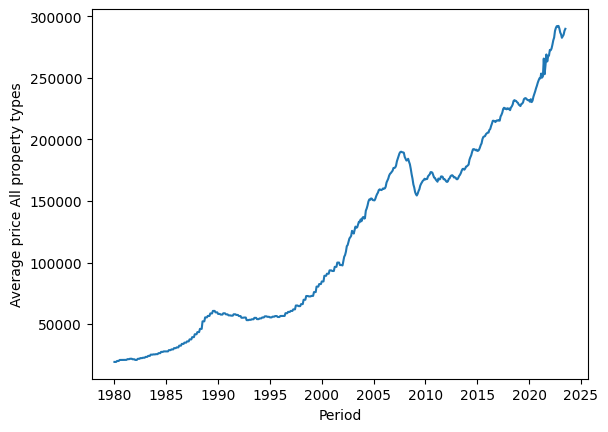

In [37]:
# plot the average house price against the time period as a line plot
# for graphing work we will use a Python library called seaborn.
import seaborn as sns
sns.lineplot(data=(dfh), x="Period", y="Average price All property types")